<a href="https://colab.research.google.com/github/Satyake/TF-ZTM/blob/main/Transfer_Learning_TFDaniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip



--2023-09-17 22:34:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.207, 64.233.181.207, 64.233.182.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  93.7MB/s    in 1.7s    

2023-09-17 22:34:19 (93.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
zip_ref=zipfile.ZipFile('/content/10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
import shutil

src_dir='/content/10_food_classes_10_percent/train/chicken_curry'
train_dir='dataset/train'
test_dir='dataset/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
image_files=[file for file in os.listdir(src_dir) if file.endswith('.jpg')]
for filename in image_files:
  source_path=os.path.join(src_dir, filename)
  destination_path=os.path.join(train_dir, filename)
  shutil.copy(source_path,destination_path)
for filename in image_files:
  source_path=os.path.join(src_dir, filename)
  destination_path=os.path.join(train_dir, filename)
  shutil.copy(source_path,destination_path)

In [ ]:
image_files

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

source_directory = '/content/10_food_classes_10_percent/test/chicken_curry/'  # Replace with the actual path

# Define the destination directories for the training and testing sets
train_directory = '/content/10_food_classes_10_percent/training/'  # Replace with the desired path
test_directory = '/content/10_food_classes_10_percent/testing/'    # Replace with the desired path

# Create the train and test directories if they don't exist
os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# List all image files in the source directory
image_files = [file for file in os.listdir(source_directory) if file.endswith('.jpg')]  # Adjust the file extension as needed

# Split the image files into training and testing sets
train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)  # You can adjust the test_size and random_state

# Copy the training files to the train directory
for filename in train_files:
    source_path = os.path.join(source_directory, filename)
    destination_path = os.path.join(train_directory, filename)
    shutil.copy(source_path, destination_path)

# Copy the testing files to the test directory
for filename in test_files:
    source_path = os.path.join(source_directory, filename)
    destination_path = os.path.join(test_directory, filename)
    shutil.copy(source_path, destination_path)


In [ ]:
import os
#walk though the directory
for dirpath, dirnames,filenames in os.walk('/content/10_food_classes_10_percent'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} filenames')

there are 2 directories and 0 filenames
there are 10 directories and 0 filenames
there are 0 directories and 250 filenames
there are 0 directories and 250 filenames
there are 0 directories and 250 filenames
there are 0 directories and 250 filenames
there are 0 directories and 250 filenames
there are 0 directories and 250 filenames
there are 0 directories and 250 filenames
there are 0 directories and 250 filenames
there are 0 directories and 250 filenames
there are 0 directories and 250 filenames
there are 10 directories and 0 filenames
there are 0 directories and 75 filenames
there are 0 directories and 75 filenames
there are 0 directories and 75 filenames
there are 0 directories and 75 filenames
there are 0 directories and 75 filenames
there are 0 directories and 75 filenames
there are 0 directories and 75 filenames
there are 0 directories and 75 filenames
there are 0 directories and 75 filenames
there are 0 directories and 75 filenames


In [ ]:
#creation of dataloaders
import tensorflow as tf
image_size=(224,224)
batch_size=32
train_dir='/content/10_food_classes_10_percent/train'
test_dir='/content/10_food_classes_10_percent/test'
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
tf.random.set_seed(42)
train_data=train_datagen.flow_from_directory(train_dir, class_mode='categorical',batch_size=batch_size, target_size=image_size,shuffle=True)
test_data=test_datagen.flow_from_directory(test_dir,class_mode='categorical',batch_size=batch_size, target_size=image_size)


Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
#callbacks for tracking the models
#create tensorboard callback (functionalized)
import datetime
def create_tensorboard_callback(dir_name,experiment_name):
  log_dir=dir_name+"/" + experiment_name
  tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving tensorboard log files to {log_dir}")
  return tensorboard_callback


In [ ]:
efficient_net_fv='https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5'
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
def create_model(model_url, num_classes=10):
  """ takes a tensorhub url and creates a keras model
  args:
      model_url:
      num_classes:"""
  model_feature_extraction= hub.KerasLayer(model_url,trainable=False, name='feature_extractor',input_shape=(224,224,3))
  model=tf.keras.Sequential([
      model_feature_extraction,
      tf.keras.layers.Dense(10,activation='softmax')
  ])

  return model

In [ ]:
eff_net=create_model(efficient_net_fv)

In [ ]:
eff_net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor (KerasLay  (None, 1280)             20331360  
 er)                                                             
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 20,344,170
Trainable params: 12,810
Non-trainable params: 20,331,360
_________________________________________________________________


In [ ]:
eff_net.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
history_eff_net=eff_net.fit(train_data,validation_data=test_data,epochs=5,callbacks=create_tensorboard_callback(dir_name='tensorboard',experiment_name='efficient_Net'))

Saving tensorboard log files to tensorboard/efficient_Net
Epoch 1/5
24/24 [==============================] - 37s 678ms/step - loss: 1.7313 - accuracy: 0.5107 - val_loss: 1.1698 - val_accuracy: 0.7448
Epoch 2/5
24/24 [==============================] - 13s 566ms/step - loss: 0.9988 - accuracy: 0.7640 - val_loss: 0.8076 - val_accuracy: 0.8048
Epoch 3/5
24/24 [==============================] - 13s 536ms/step - loss: 0.7513 - accuracy: 0.8200 - val_loss: 0.6751 - val_accuracy: 0.8200
Epoch 4/5
24/24 [==============================] - 13s 546ms/step - loss: 0.6318 - accuracy: 0.8373 - val_loss: 0.6074 - val_accuracy: 0.8336
Epoch 5/5
24/24 [==============================] - 13s 539ms/step - loss: 0.5480 - accuracy: 0.8707 - val_loss: 0.5660 - val_accuracy: 0.8388


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history['val_loss']
  epochs=range(len(history.history["loss"]))
  accuracy=history.history['accuracy']
  val_Accuracy=history.history['val_accuracy']
  plt.figure(figsize=(5,2))
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()
  plt.figure(figsize=(5,2))
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_Accuracy, label='val_accuracy')
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()




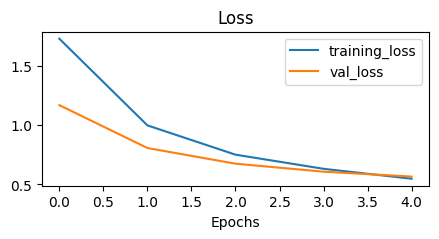

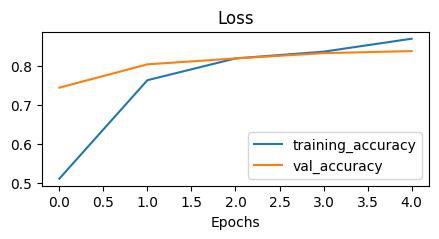

In [ ]:
plot_loss_curves(history_eff_net)

In [ ]:
resnet_50='https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'

model_resnet=create_model(resnet_50,num_classes=10)
model_resnet.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
history_resnet_fv=model_resnet.fit(train_data,validation_data=test_data, epochs=5, callbacks=[create_tensorboard_callback(dir_name='tensorboard_resnet',experiment_name='ResNet50V2')])

Saving tensorboard log files to tensorboard_resnet/ResNet50V2
Epoch 1/5
24/24 [==============================] - 21s 583ms/step - loss: 1.9400 - accuracy: 0.3587 - val_loss: 1.0589 - val_accuracy: 0.6900
Epoch 2/5
24/24 [==============================] - 13s 551ms/step - loss: 0.8241 - accuracy: 0.7427 - val_loss: 0.7409 - val_accuracy: 0.7748
Epoch 3/5
24/24 [==============================] - 11s 474ms/step - loss: 0.5892 - accuracy: 0.8187 - val_loss: 0.6202 - val_accuracy: 0.8148
Epoch 4/5
24/24 [==============================] - 11s 475ms/step - loss: 0.4143 - accuracy: 0.9013 - val_loss: 0.5677 - val_accuracy: 0.8332
Epoch 5/5
24/24 [==============================] - 11s 481ms/step - loss: 0.3255 - accuracy: 0.9413 - val_loss: 0.5421 - val_accuracy: 0.8324


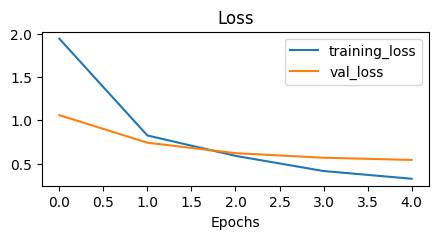

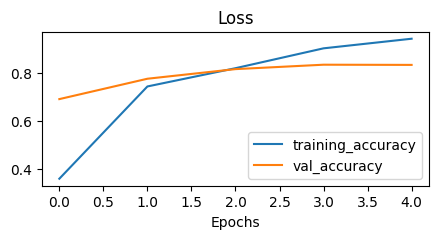

In [ ]:
plot_loss_curves(history_resnet_fv)

In [ ]:
#!tensorboard dev upload --logdir ./tensorboard/ \
# --name="EfficientNet"\
# --description="Efficient Net metrics"\
# --one_shot

In [ ]:
#!tensorboard dev list

In [ ]:
#!tensorboard dev upload --logdir ./tensorboard_resnet/

In [ ]:
#!unzip '/content/10_food_classes_10_percent.zip'

In [ ]:
import os
for dirpath,dirnames,filenames in os.walk('/content/10_food_classes_10_percent/'):
  print(f'there {len(dirnames)} folders containing {len(filenames)} filenames')

there 2 folders containing 0 filenames
there 10 folders containing 0 filenames
there 0 folders containing 75 filenames
there 0 folders containing 75 filenames
there 0 folders containing 75 filenames
there 0 folders containing 75 filenames
there 0 folders containing 75 filenames
there 0 folders containing 75 filenames
there 0 folders containing 75 filenames
there 0 folders containing 75 filenames
there 0 folders containing 75 filenames
there 0 folders containing 75 filenames
there 10 folders containing 0 filenames
there 0 folders containing 250 filenames
there 0 folders containing 250 filenames
there 0 folders containing 250 filenames
there 0 folders containing 250 filenames
there 0 folders containing 250 filenames
there 0 folders containing 250 filenames
there 0 folders containing 250 filenames
there 0 folders containing 250 filenames
there 0 folders containing 250 filenames
there 0 folders containing 250 filenames


In [ ]:
#setupdatagenerators
train_dir='/content/10_food_classes_10_percent/train'
test_dir='/content/10_food_classes_10_percent/test'

In [ ]:
train_data_gen=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode='categorical',image_size=(224,224),batch_size=32)
test_data_gen=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode='categorical',image_size=(224,224),batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_gen

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_gen.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
#for images, labels in train_data_gen.take(1): #unravel a batch:
#  print(images, labels)

In [ ]:
#functional API Transfer learning feature extraction freeze base models

base_model=tf.keras.applications.EfficientNetB0(include_top=False)

#freeze the base model so underlying patterns not touched
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

#if if using lets say, resnet50v2 you need to normalize

#x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255.0)(inputs)
x=base_model(inputs)
GAP=tf.keras.layers.GlobalAveragePooling2D(name='GAP')(x)
outputs=tf.keras.layers.Dense(10,activation='softmax')(GAP)


16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
model=tf.keras.Model(inputs,outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GAP (GlobalAveragePooling2D  (None, 1280)             0         
 )                                                               
                                                                 
 dense_2 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='./Transferlearning')

In [ ]:
history=model.fit(train_data_gen,validation_data=test_data_gen,epochs=5, steps_per_epoch=len(train_data_gen), validation_steps=int(len(test_data_gen)*0.25),callbacks=[tensorboard])

Epoch 1/5
24/24 [==============================] - 13s 260ms/step - loss: 1.8812 - accuracy: 0.4067 - val_loss: 1.2954 - val_accuracy: 0.7500
Epoch 2/5
24/24 [==============================] - 4s 140ms/step - loss: 1.0993 - accuracy: 0.7680 - val_loss: 0.8528 - val_accuracy: 0.8191
Epoch 3/5
24/24 [==============================] - 4s 143ms/step - loss: 0.7912 - accuracy: 0.8227 - val_loss: 0.6901 - val_accuracy: 0.8553
Epoch 4/5
24/24 [==============================] - 5s 195ms/step - loss: 0.6356 - accuracy: 0.8520 - val_loss: 0.6179 - val_accuracy: 0.8470
Epoch 5/5
24/24 [==============================] - 4s 142ms/step - loss: 0.5429 - accuracy: 0.8680 - val_loss: 0.5597 - val_accuracy: 0.8651


In [ ]:
 #for layer_number, layer in enumerate(base_model.layers):
 # print(layer_number, layer.name)

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GAP (GlobalAveragePooling2D  (None, 1280)             0         
 )                                                               
                                                                 
 dense_2 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


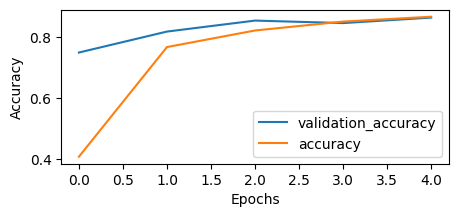

In [ ]:
plt.figure(figsize=(5,2))
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#getting the feature vector (GAP layer)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-08-03 20:27:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  21.0MB/s    in 7.3s    

2023-08-03 20:27:44 (17.3 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
import zipfile

In [ ]:
z=zipfile.ZipFile('/content/10_food_classes_1_percent.zip')
z.extractall()
z.close()

In [ ]:
train_dir='/content/10_food_classes_1_percent/train/'
test_dir='/content/10_food_classes_1_percent/test/'

In [ ]:
train_data_gen=tf.keras.preprocessing.image_dataset_from_directory(train_dir, batch_size=32, shuffle=True, image_size=(224,224),label_mode='categorical')
test_data_gen=tf.keras.preprocessing.image_dataset_from_directory(test_dir,batch_size=32,shuffle=False,image_size=(224,224),label_mode='categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
for labels, images in train_data_gen.take(1):
  print(images)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

In [ ]:
#build a data augmentation layer inside the model directly
#create augmentation with hflips, rotations, zooms
data_augmentation=tf.keras.Sequential([

tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
tf.keras.layers.experimental.preprocessing.Rescaling(1/255.0)
],name='data_augmentation_layer')



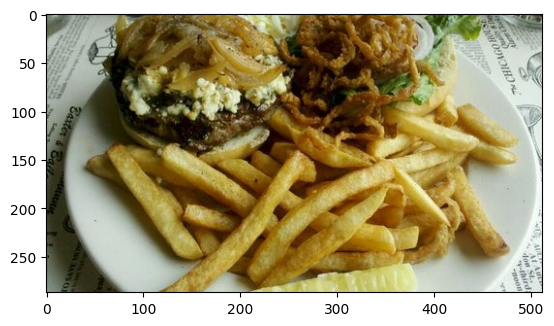

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class=random.choice(train_data_gen.class_names)
target_dir='/content/10_food_classes_1_percent/train/'+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+'/'+random_image
img=mpimg.imread(random_image_path)
plt.imshow(img)

In [ ]:
augmented_img=data_augmentation(img)

In [ ]:
img.shape

(287, 512, 3)

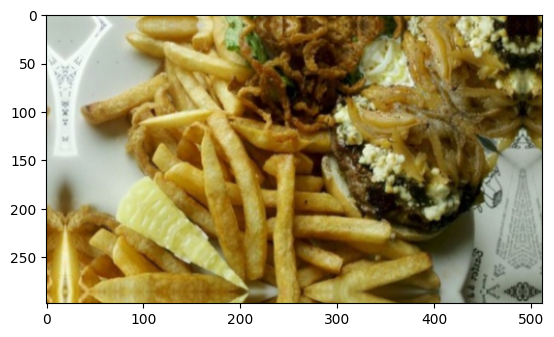

In [ ]:
plt.figure()
plt.imshow(augmented_img)

In [ ]:
train_dir='/content/10_food_classes_10_percent/train/'
test_dir='/content/10_food_classes_10_percent/test/'

train_data_gen=tf.keras.preprocessing.image_dataset_from_directory(train_dir, batch_size=32, shuffle=True, image_size=(224,224),label_mode='categorical')
test_data_gen=tf.keras.preprocessing.image_dataset_from_directory(test_dir,batch_size=32,shuffle=False,image_size=(224,224),label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

#input layer
inputs=tf.keras.layers.Input(shape=input_shape,name='input_layer')

#add data augmentation _layer
x=data_augmentation(inputs)

#give base_model after inputs augmented
x=base_model(x,training=False)

#pool output  features of the base model
x=tf.keras.layers.GlobalAveragePooling2D()(x)

#add a last dense layer
outputs=tf.keras.layers.Dense(10,activation='softmax')(x)

model=tf.keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, 512, 3)           0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'],loss='categorical_crossentropy')


In [ ]:
history_model_1training_data=model.fit(train_data_gen,validation_data=test_data_gen,epochs=10,steps_per_epoch=len(train_data_gen),validation_steps=len(test_data_gen))

Epoch 1/10
24/24 [==============================] - 28s 851ms/step - loss: 2.3498 - accuracy: 0.1040 - val_loss: 2.3154 - val_accuracy: 0.1000
Epoch 2/10
24/24 [==============================] - 12s 466ms/step - loss: 2.3430 - accuracy: 0.0707 - val_loss: 2.3090 - val_accuracy: 0.1000
Epoch 3/10
24/24 [==============================] - 9s 361ms/step - loss: 2.3337 - accuracy: 0.0653 - val_loss: 2.3122 - val_accuracy: 0.1000
Epoch 4/10
24/24 [==============================] - 9s 366ms/step - loss: 2.3405 - accuracy: 0.1067 - val_loss: 2.3318 - val_accuracy: 0.1000
Epoch 5/10
24/24 [==============================] - 9s 378ms/step - loss: 2.3596 - accuracy: 0.0787 - val_loss: 2.3243 - val_accuracy: 0.1000
Epoch 6/10
24/24 [==============================] - 8s 326ms/step - loss: 2.3496 - accuracy: 0.0720 - val_loss: 2.3120 - val_accuracy: 0.1112
Epoch 7/10
24/24 [==============================] - 8s 316ms/step - loss: 2.3343 - accuracy: 0.1000 - val_loss: 2.3174 - val_accuracy: 0.1000
Epoc

In [ ]:



base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])
inputs=tf.keras.layers.Input(shape=(224,224,3))
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
output_layer=tf.keras.layers.Dense(10,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs, outputs=output_layer)
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, None, 224, 3)      0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
____________________________________________

In [ ]:
callbacks=tf.keras.callbacks.ModelCheckpoint('checkpoint2/',save_freq='epoch',save_best_only=False,save_weights_only=True)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'],loss='categorical_crossentropy')


In [ ]:

h1=model.fit(train_data_gen,validation_data=test_data_gen,epochs=5, steps_per_epoch=len(train_data_gen), validation_steps=len(test_data_gen),callbacks=[callbacks])

Epoch 1/5
24/24 [==============================] - 17s 423ms/step - loss: 1.9986 - accuracy: 0.3493 - val_loss: 1.3900 - val_accuracy: 0.7072
Epoch 2/5
24/24 [==============================] - 8s 317ms/step - loss: 1.2545 - accuracy: 0.7453 - val_loss: 0.9386 - val_accuracy: 0.7976
Epoch 3/5
24/24 [==============================] - 8s 319ms/step - loss: 0.9360 - accuracy: 0.7933 - val_loss: 0.7450 - val_accuracy: 0.8272
Epoch 4/5
24/24 [==============================] - 8s 319ms/step - loss: 0.7922 - accuracy: 0.8200 - val_loss: 0.6455 - val_accuracy: 0.8424
Epoch 5/5
24/24 [==============================] - 8s 323ms/step - loss: 0.6675 - accuracy: 0.8333 - val_loss: 0.5840 - val_accuracy: 0.8544


In [ ]:
results_10_percent_data_aug=model.evaluate(test_data_gen)
results_10_percent_data_aug

79/79 [==============================] - 7s 82ms/step - loss: 0.5840 - accuracy: 0.8544


[0.5840294361114502, 0.8543999791145325]

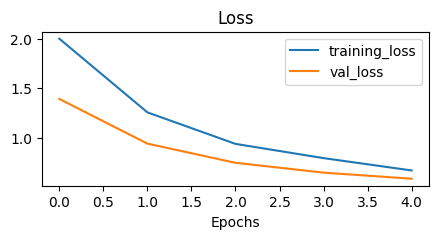

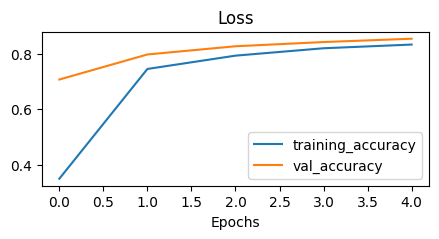

In [ ]:
plot_loss_curves(h1)

In [ ]:
model.load_weights('/content/checkpoint2/')

In [ ]:
model.evaluate(test_data_gen)

79/79 [==============================] - 6s 72ms/step - loss: 0.5840 - accuracy: 0.8544


[0.5840294361114502, 0.8543999791145325]

In [ ]:
for layer in model.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7aae30145e10> True
<keras.engine.sequential.Sequential object at 0x7aaec698dd80> True
<keras.engine.functional.Functional object at 0x7aaec69cd0c0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7aaec698d0f0> True
<keras.layers.core.dense.Dense object at 0x7aaec6a1f010> True


In [ ]:
for i,layer in enumerate(model.layers[2].layers):
  print(i,layer.name, layer.trainable)

In [ ]:
#fine tuning the model
#start by setting last 10 layers of the base_model.trainable=True
base_model.trainable=True
#freeze all layers except for the last 10
for layer in base_model.layers[:-10]: #every layer except last 10
     layer.trainable=False
#recompile
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy']) #for fine tunning rule of thumb lower learning rate by 10x to avoid drastic change in features


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, None, 224, 3)      0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 906,042
Non-trainable params: 3,156,339
___________________________________________

In [ ]:
len(model.trainable_variables)

12

In [ ]:
fine_tune_epochs=10
history_fine_tune_10_percent_data_aug=model.fit(train_data_gen,validation_data=test_data_gen,epochs=fine_tune_epochs, validation_steps=int(0.25*len(test_data_gen)),initial_epoch=h1.epoch[-1],callbacks=[callbacks])   #start training from previous last epoch

Epoch 5/10
24/24 [==============================] - 17s 292ms/step - loss: 0.5552 - accuracy: 0.8400 - val_loss: 0.5997 - val_accuracy: 0.8092
Epoch 6/10
24/24 [==============================] - 4s 163ms/step - loss: 0.4693 - accuracy: 0.8600 - val_loss: 0.5719 - val_accuracy: 0.8092
Epoch 7/10
24/24 [==============================] - 4s 147ms/step - loss: 0.3740 - accuracy: 0.8973 - val_loss: 0.5461 - val_accuracy: 0.8141
Epoch 8/10
24/24 [==============================] - 5s 182ms/step - loss: 0.3404 - accuracy: 0.9053 - val_loss: 0.5464 - val_accuracy: 0.8289
Epoch 9/10
24/24 [==============================] - 4s 150ms/step - loss: 0.2947 - accuracy: 0.9200 - val_loss: 0.5439 - val_accuracy: 0.8240
Epoch 10/10
24/24 [==============================] - 4s 156ms/step - loss: 0.2701 - accuracy: 0.9320 - val_loss: 0.5284 - val_accuracy: 0.8207


In [ ]:
results_fine_tuned_evaluation=model.evaluate(test_data_gen)

79/79 [==============================] - 7s 85ms/step - loss: 0.3914 - accuracy: 0.8672


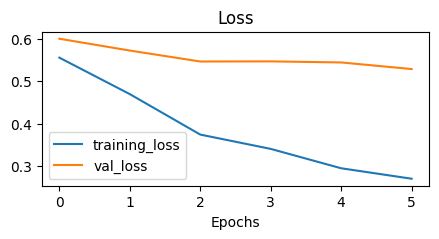

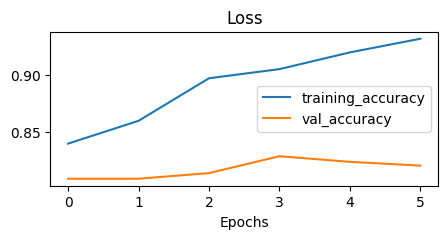

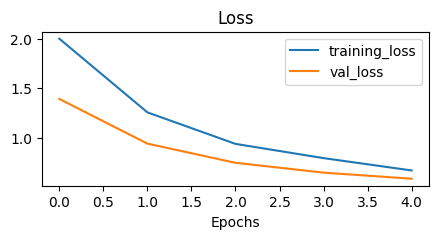

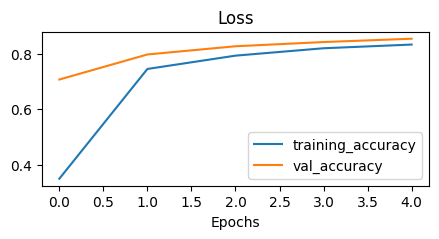

In [ ]:
plot_loss_curves(history_fine_tune_10_percent_data_aug)
plot_loss_curves(h1)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-08-03 20:41:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.8MB/s    in 24s     

2023-08-03 20:41:30 (20.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import zipfile

In [ ]:
z=zipfile.ZipFile('/content/10_food_classes_all_data.zip')
z.extractall()
z.close()

In [ ]:
train_dir='/content/10_food_classes_all_data/train'
test_dir='/content/10_food_classes_all_data/test'

In [ ]:
#for j,k,l in os.walk('/content/10_food_classes_all_data/'):
#  print(len(j),len(k),len(l))

In [ ]:
train_datagen=tf.keras.preprocessing.image_dataset_from_directory(train_dir, batch_size=32, shuffle=True, label_mode='categorical',image_size=(224,224))
test_datagen=tf.keras.preprocessing.image_dataset_from_directory(test_dir,batch_size=32,shuffle=False, label_mode='categorical',image_size=(224,224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#evaluate  model 2 fine tuned on 10percent
model.evaluate(test_datagen)

79/79 [==============================] - 6s 69ms/step - loss: 0.3914 - accuracy: 0.8672


[0.391426682472229, 0.8672000169754028]

In [ ]:
for layer_number, layer in enumerate(model.layers):
  print(layer_number,layer)

0 <keras.engine.input_layer.InputLayer object at 0x7aae30145e10>
1 <keras.engine.sequential.Sequential object at 0x7aaec698dd80>
2 <keras.engine.functional.Functional object at 0x7aaec69cd0c0>
3 <keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7aaec698d0f0>
4 <keras.layers.core.dense.Dense object at 0x7aaec6a1f010>


In [ ]:
for layer_number, layer in enumerate(model.layers[2].layers):
  print(layer_number,layer,layer.trainable)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

In [ ]:
history_finetune_all_data=model.fit(train_datagen, validation_data=test_datagen, epochs=12, validation_steps=int(0.25*len(test_datagen)),steps_per_epoch=len(train_datagen), initial_epoch=h1.epoch[-1])

Epoch 5/12
235/235 [==============================] - 34s 108ms/step - loss: 0.5314 - accuracy: 0.8391 - val_loss: 0.2107 - val_accuracy: 0.9276
Epoch 6/12
235/235 [==============================] - 24s 99ms/step - loss: 0.3355 - accuracy: 0.8933 - val_loss: 0.1839 - val_accuracy: 0.9375
Epoch 7/12
235/235 [==============================] - 21s 88ms/step - loss: 0.2600 - accuracy: 0.9124 - val_loss: 0.2907 - val_accuracy: 0.9079
Epoch 8/12
235/235 [==============================] - 21s 89ms/step - loss: 0.2045 - accuracy: 0.9336 - val_loss: 0.1743 - val_accuracy: 0.9408
Epoch 9/12
235/235 [==============================] - 20s 85ms/step - loss: 0.1684 - accuracy: 0.9444 - val_loss: 0.2137 - val_accuracy: 0.9375
Epoch 10/12
235/235 [==============================] - 21s 88ms/step - loss: 0.1347 - accuracy: 0.9543 - val_loss: 0.2743 - val_accuracy: 0.9211
Epoch 11/12
235/235 [==============================] - 22s 92ms/step - loss: 0.1309 - accuracy: 0.9536 - val_loss: 0.2766 - val_accura

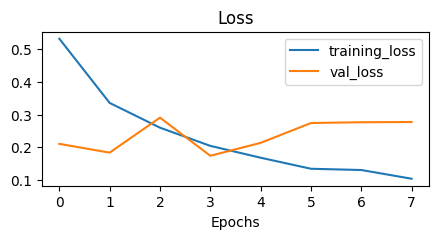

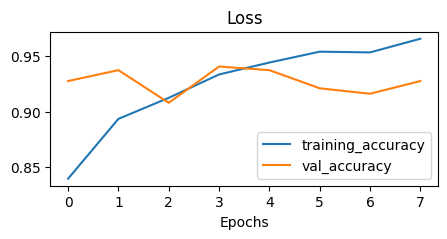

In [ ]:
plot_loss_curves(history_finetune_all_data)